# OKCupid Date-A-Scientist: Machine Learning Project

## Project Scope 
In recent years, there has been a massive rise in the usage of dating apps to find love. 
Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

This dataset has been taken from https://codecademy.com.

### Project Goals
The main goals of this project are to use some machine learning algorithms to make a prediction. The main research question is whether we can predict a person's sexual orientation based on other variables in the dataset. This is important as this is a fundamental first step in determining whether two people on the app are compatible or not, and OkCupid can try to match two people in this way. 

### Analysis
We will perform some initial Exploratory Data Analysis (EDA) and data cleaning techniques to understand the data better and get it into a more readable, intuitive form. We will then preprocess the data to get it ready for use in machine-learning algorithms. Our task is a classification problem so we will use skikit-learn's supervised learning classifiers to make our predictions.

### Evaluation / Tuning

Once the machine learning algorithms are trained using our data, it will be time to evaluate our models and tune hyperparameters to ensure our model is performing as good as it can!

## Importing Modules
Import the libraries necessary for some initial exploratory data analysis (EDA) and data cleaning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]
import seaborn as sns
%timeit
%matplotlib inline

## Importing dataset
Import the dataset into a pandas DataFrame called `daters` and print out the first 10 rows to inspect the data we have.

In [2]:
pd.set_option('display.max_columns', None)
daters = pd.read_csv('profiles.csv')
daters.head(10)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
5,29,average,mostly anything,socially,NaN,graduated from college/university,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,"books: to kill a mockingbird, lord of the ring...","like everyone else, i love my friends and fami...",what my contribution to the world is going to ...,out with my friends!,i cried on my first day at school because a bi...,you're awesome.,white,67.0,-1,computer / hardware / software,2012-06-29-19-18,"san francisco, california","doesn&rsquo;t have kids, but mig

Inspect the column data types and the number of null values in each column, to see if we can potentially replace or remove them, depending on the type of data that is missing

In [3]:
print(daters.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

### Data Characteristics

`daters` has a total of **31 columns** and **59,946 rows** , with 3 `numeric` and the rest of them currently set as `object` type. 

The columns in our dataset include:

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

We can dive deeper into each column to explore:
- missing or `NaN` values and what form they come in (sometimes NaN values are not obvious!)
- assigning the correct data type suited for the data in the column
- a proper name for each column for better readability 

## Exploratory Data Analysis

We will now try to explore some columns to gathe rbetter insight into the values users have inputted, missing data and how to replace / remove it, and whether out data is representative without bias or not!

The first thing we should do is make sure there are a similar amount of males and females in our data!

#### `sex`

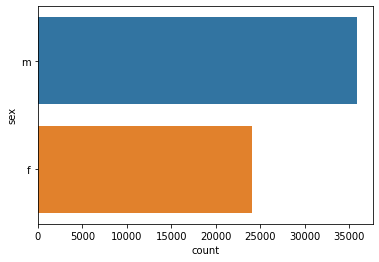

m    0.597688
f    0.402312
Name: sex, dtype: float64
There are 35830 men and 24118 women in our dataset, meaning that we have approximately 48.6% more males than females.


In [4]:
sns.countplot(data=daters,y='sex')
plt.show()
print(daters.sex.value_counts(normalize=True))
number_of_females = int(len(daters)*daters.sex.value_counts(normalize=True)[1])+1
number_of_males = int(len(daters)*daters.sex.value_counts(normalize=True)[0])+1
print(f'There are {number_of_males} men and {number_of_females} women in our dataset, meaning that we have approximately {np.round((number_of_males-number_of_females)/number_of_females * 100,1)}% more males than females.')

Although there are more males than females, they are on a similar scale, so our data is alright and not unusable.

### Label / Outcome variable
#### `orientation`

The first column we will explore is the column we will try to predict!

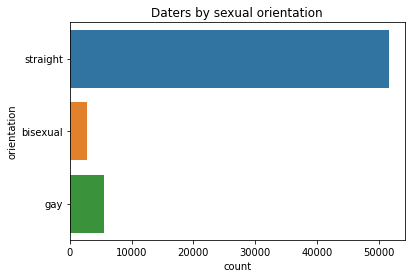

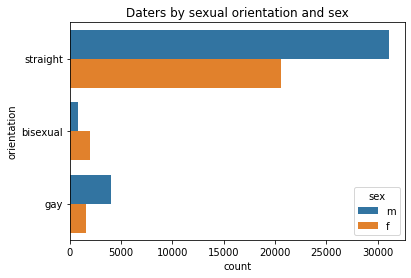

In [5]:
sns.countplot(data=daters,y='orientation')
plt.title('Daters by sexual orientation')
plt.show()
plt.clf()

sns.countplot(data=daters,y='orientation',hue='sex')
plt.title('Daters by sexual orientation and sex')
plt.show()

### Continuous variables
#### `age` 

26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: age, dtype: int64


<AxesSubplot:xlabel='age', ylabel='Count'>

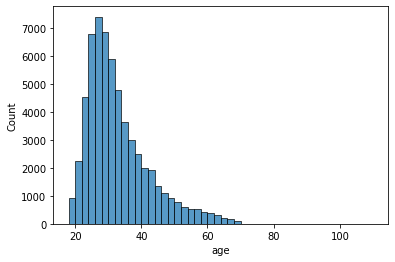

In [6]:
print(daters.age.value_counts(dropna=False))
sns.histplot(daters.age,binwidth=2)

Looks like we have 2 massive outliers in the age column, `109` and `110` to be exact. There is no way to authenticate whether two indidivuals with this age actually signed up to the platform. It is very likely however, that these are points which could be illegitimate and created by some younger users for 'fun.' Because there is not much data around this age range, it should be fine to remove these two rows, but let's see their data to further investigate:

In [7]:
print(daters[(daters.age==109) | (daters.age==110)])

       age body_type          diet drinks  drugs                   education  \
2512   110       NaN           NaN    NaN    NaN                         NaN   
25324  109  athletic  mostly other    NaN  never  working on masters program   

      essay0 essay1 essay2   essay3 essay4 essay5 essay6 essay7 essay8 essay9  \
2512     NaN    NaN    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25324    NaN    NaN    NaN  nothing    NaN    NaN    NaN    NaN    NaN    NaN   

      ethnicity  height  income      job       last_online  \
2512        NaN    67.0      -1      NaN  2012-06-27-22-16   
25324       NaN    95.0      -1  student  2012-06-30-18-18   

                        location        offspring orientation pets  \
2512       daly city, california              NaN    straight  NaN   
25324  san francisco, california  might want kids    straight  NaN   

                                  religion sex  \
2512                                   NaN   f   
25324  other and 

Some potential red flags concerning legitimacy of these two samples:
- the 109 year old male is almost 8 feet tall!
- the 109 year old male is athletic

I will therefore remove these two rows:

The average age of people in the dataset is 32.3 ± 9.4.
The median age of people in the dataset is 30.0.


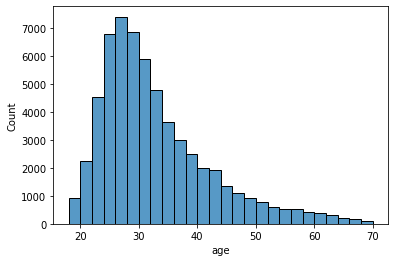

In [8]:
daters = daters[daters.age < 100]
sns.histplot(data = daters,x='age',binwidth=2)
print(f'The average age of people in the dataset is {np.round(np.mean(daters.age),1)} \u00B1 {np.round(np.std(daters.age),1)}.')
print(f'The median age of people in the dataset is {np.round(np.median(daters.age),1)}.')

Below is our `age` distribution now separated by sex, it seems like each age category has approximately the same number of males and females, but our dataset has fewer females overall!

<AxesSubplot:xlabel='age', ylabel='Count'>

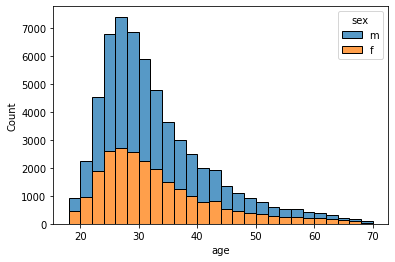

In [9]:
sns.histplot(data=daters,x='age',hue='sex',binwidth=2,multiple='stack')

It seems like our data is positively-/right-skewed which means most of our daters are young (below average age)!

#### `income`

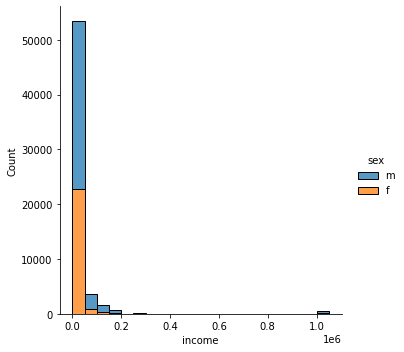

In [10]:
sns.displot(data=daters,x='income',hue='sex',kind='hist',binwidth = 50000,multiple='stack')

It seems that most of our daters chose not to input their income into their profile...

In [11]:
print(daters.income.value_counts())

-1          48440
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64


#### `height`

We can see below the height distribution of our dataset, separated by sex.

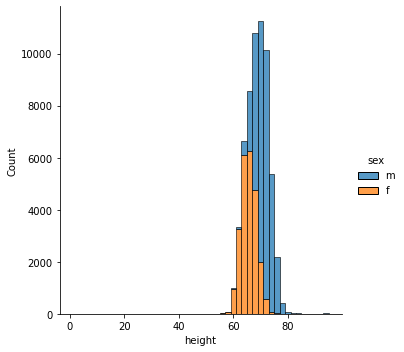

The average height of males is 5'10" while the average height of females is 5'5".


In [12]:
sns.displot(data=daters,x='height',hue='sex',kind='hist',binwidth = 2,multiple='stack')
plt.show()
average_male_height = daters[daters.sex == 'm'].height.mean()
average_female_height = daters[daters.sex == 'f'].height.mean()
print(f'The average height of males is {int(average_male_height/12)}\'{int((average_male_height/12 - np.floor(average_male_height/12))*12)}\" while the average height of females is {int(average_female_height/12)}\'{int((average_female_height/12 - np.floor(average_female_height/12))*12)}\".')

### Discrete variables

#### `body_type`

average           14652
fit               12711
athletic          11818
NaN                5295
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64


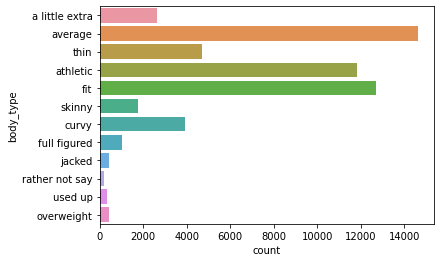

In [13]:
print(daters.body_type.value_counts(dropna=False))
sns.countplot(data=daters,y='body_type')
plt.show()

Looks like we have missing data in two forms here: 
1. people who did not enter their `body_type` at all, giving us `NaN` values
2. people who chose the option `rather not say`

We can see below the breakdown of body type by sex. What is interesting is that some body types are highly gendered, for example, the 'curvy' body type is almost exclusively entered by females while the 'athletic' body type is mostly entered by males.

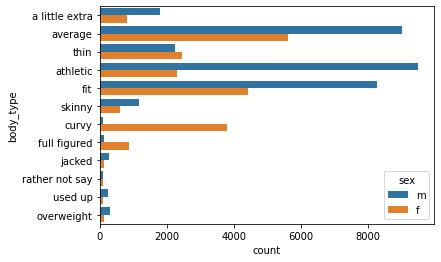

In [14]:
sns.countplot(data=daters,y='body_type',hue='sex')
plt.show()

#### `diet` 

Below is a chart showing the different dietary information input by the users:

mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1006
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: diet, dtype: int64


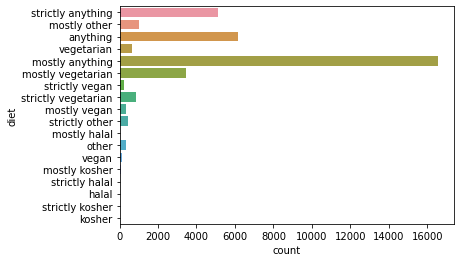

In [15]:
print(daters.diet.value_counts())
sns.countplot(data=daters,y='diet')
plt.show()

There seems to be 6 main categories with further subcategories of 'mostly' and 'strictly'. It will be better for our purposes to just keep 6 categories without having the further breakdowns, as some categories have very few people.

mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1006
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: diet, dtype: int64


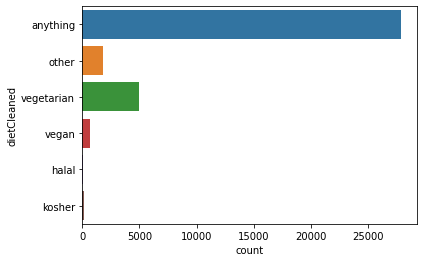

In [16]:
daters['dietCleaned'] = daters.diet.replace({'\w{6,8} anything':'anything','\w{6,8} other':'other',\
                    '\w{6,8} vegan':'vegan','\w{6,8} vegetarian':'vegetarian',\
                    '\w{6,8} halal':'halal','\w{6,8} kosher':'kosher'},regex=True)
print(daters.diet.value_counts())
sns.countplot(data=daters,y='dietCleaned')
plt.show()

It is clear that most daters are open to any diet, and this is a popular signal to potential partners.

#### `drinks`

The vast majority of users drink 'socially', while the 2nd largest population are people who 'rarely' drink and then people who drink 'often'. There is no data to indicate what 'often' means, but it can be thought of as more than 'socially'! 


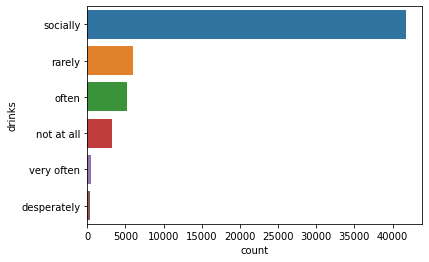

In [17]:
sns.countplot(data=daters,y='drinks',order = daters.drinks.value_counts().index)
plt.show()

#### `drugs`

The overwhelming majority of users have 'never' used drugs.

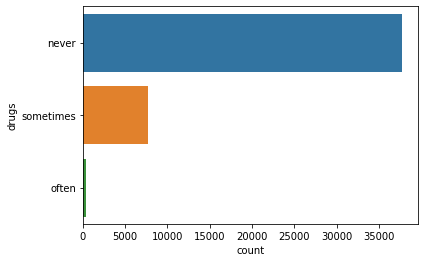

In [18]:
sns.countplot(data = daters,y='drugs',order = daters.drugs.value_counts().index)
plt.show()

#### `education`

Most people have graduated from university level programs, with 'college/university' graduates the most, and 'masters program' graduates coming in 2nd.

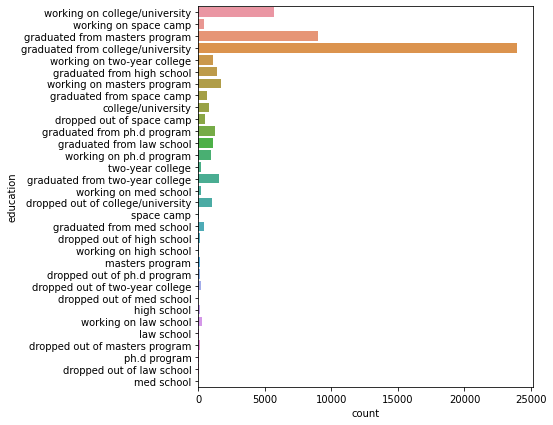

In [19]:
plt.figure(figsize=(6,7))
sns.countplot(data=daters,y='education')
plt.show()

#### `job`

Most users do not fit into the categories provided by OkCupid. Perhaps OkCupid can send a survey to each user asking for their job title to make sure they have more categories that fir their users better. It seems that most users are students, and people with jobs are in 'science/tech/engineering' or 'artistic/musical/writer', two opposite ends of the spectrum in academia!


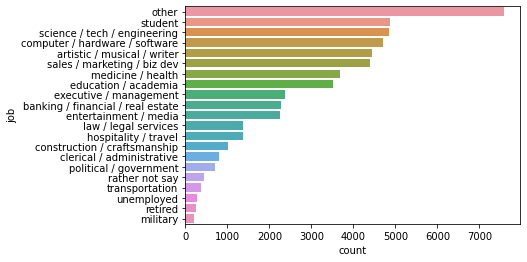

In [20]:
sns.countplot(data=daters,y='job',order = daters.job.value_counts().index)
plt.show()

#### `offspring`

Most people do not have kids, but the 2nd most popular response is from people who don't have kids, 'but might want them'.

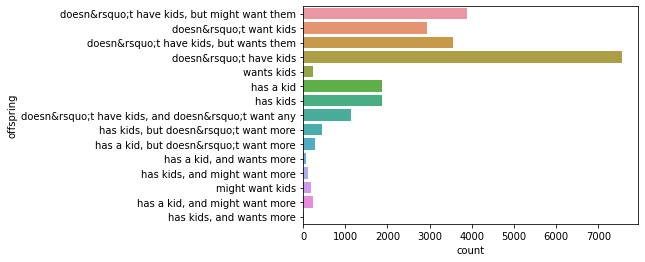

In [21]:
sns.countplot(data=daters,y='offspring')
plt.show()

#### `pets`

Most users like both cats and dogs, and therefore appeal to cat- and dog-lovers.

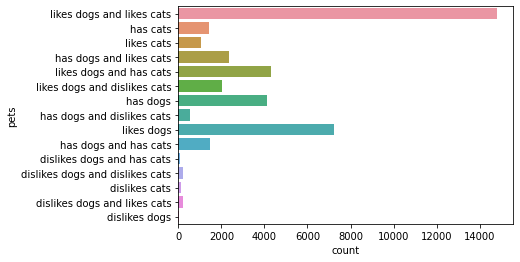

In [22]:
sns.countplot(data=daters,y='pets')
plt.show()

#### `religion`

There are many qualifiers set for religion, but again for our purposes, it is better to categorise these into a single category for the religion!

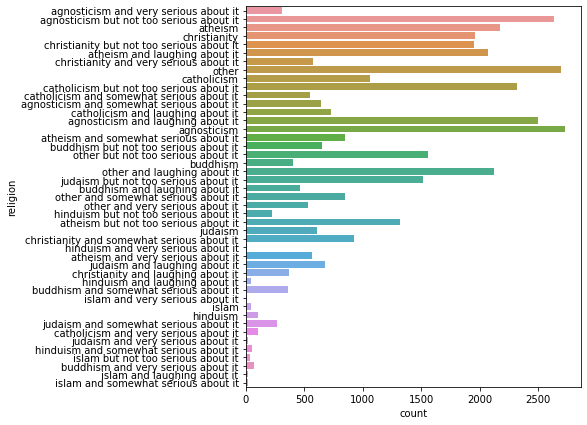

In [23]:
plt.figure(figsize=(6,7))
sns.countplot(data=daters,y='religion')
plt.show()

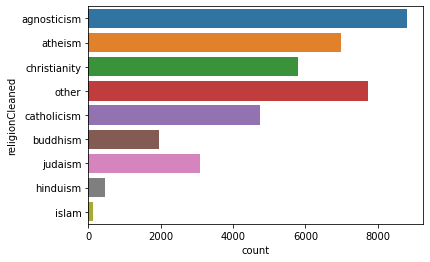

In [24]:
daters['religionCleaned'] = daters.religion.str.split().str.get(0)
sns.countplot(data=daters,y='religionCleaned')
plt.show()

#### `sign`

There are many qualifiers set for sign, but again for our purposes, it is better to categorise these into a single category for the sign, meaning that there should only be 12 categories here for the 12 star signs!

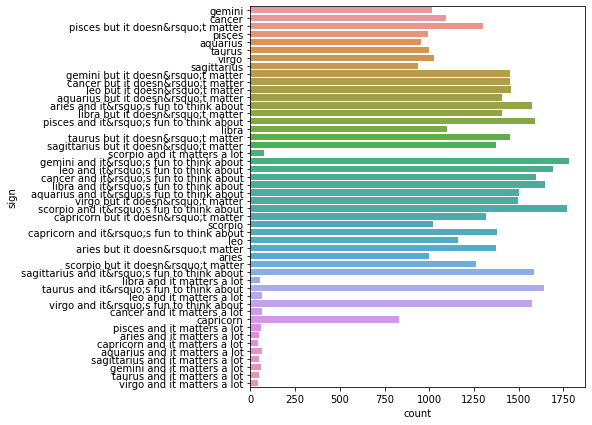

In [25]:
plt.figure(figsize=(6,7))
sns.countplot(data=daters,y='sign')
plt.show()

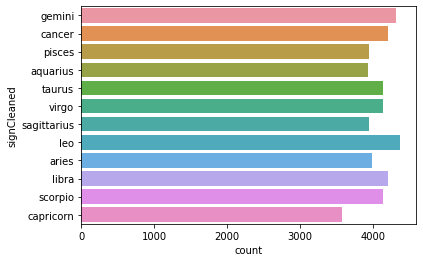

In [26]:
daters['signCleaned'] = daters.sign.str.split().str.get(0)
sns.countplot(data=daters,y='signCleaned')
plt.show()

A very equal distribution of people across the star signs!

#### `smokes`

The majority of users do not smoke, and the 2nd most popular is occasionally smoking, i.e. 'sometimes' and 'when drinking'.

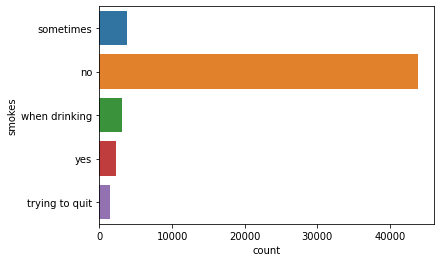

In [27]:
sns.countplot(data=daters, y='smokes')
plt.show()

#### `status`

As one can expect from a dating app, most users' relationship status is single.
(I'm not too sure the people who are 'seeing someone' will get too many matches on this app...)

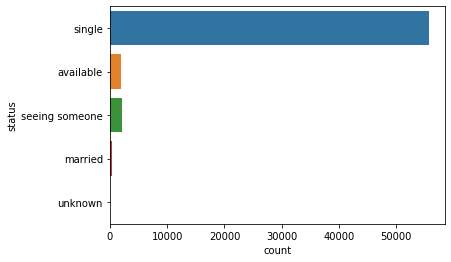

In [28]:
sns.countplot(data=daters,y='status')
plt.show()

In [29]:
%store daters

Stored 'daters' (DataFrame)
